<figure>
  <IMG SRC="LogoENSEGID.png" WIDTH=125 ALIGN="right">
</figure>

# EQUATION DE DIFFUSIVITE: PRINCIPE DE SUPERPOSITION ET APPLICATIONS AUX ESSAIS DE NAPPE


# Equation de diffusivité

Pour nue nappe captive, l'évolution spatiale et temporelle de la hauteur piézométrique est régie par l'équation de diffusivité:

$$\nabla T. \nabla h = -S \frac{\partial h}{\partial t}$$

avec $T$ transmissivité ($m^2.s^{-1}$), $S$ coefficient d'emmagasinement ($-$).

Pour beaucoup d'applications, et notamment les solutions associées à des puits de pompage, il est pratique d'exprimer l'équation de diffusivité en coordonnées polaires:

$$\frac{\partial^2 h}{\partial r^2} + \frac{1}{r}\frac{\partial h}{\partial r} = \frac{S}{T}\frac{\partial h}{\partial t}$$

avec $r$ la distance au point origine du repère polaire.

# Principe de superposition

Le principe de superposition pose que pour tout système linéaire, la réponse causée par deux ou plusieurs stimuli est la somme des réponses qui auraient été engendrées par chaque stimulus individuellement. Ainsi si la stimulation A produit la réponse $X$ et si la stimulation $B$ produit la réponse $Y$, alors la stimulation $(A + B)$ générera la réponse $(X + Y)$.
Une fonction $F(x)$ qui répond au principe de superposition est appelée une fonction linéaire.

La superposition peut être définie pour la fonction par 2 propriétés: additivité et homogénéité

- Additivité

$$
F(x+y) = F(x) + F(y)
$$

- Homogénéité

$$
F(ax) = aF(x)
$$

L'équation de diffusivité pour un système captif homogène est une équation linéaire. On peut donc lui appliquer le principe de superposition. On peut également appliquer ce principe à toutes les équations qui correspondent à des solutions particulières de cette équation mère.
A ce titre, le principe de superposition peut être utilisé pour l'équation de Theis.

L'application du principe de superposition à l'équation de diffusivité trouve de nombreuses utilisations en hydrogéologie pratique:
- estimation de l'influence de pompage à débit variable;
- estimation de l'influence de pompages simultanés;
- étude de l'arrêt d'un pompage;
- étude de l'influence de limites spatiales de l'aquifère sur l'évolution de la piézométrie lors d'un pompage;
- etc ...

## Superposition spatiale - Etude d'un champ captant

Un champ captant est un dispositif d'exploitation d'une nappe constitué par plusieurs puits de pompage exploités simulanément ou de manière asynchrone. L'étude de l'impact sur la nappe peut être abordé à partir du principe de superposition et de la solution de Theis.

<figure>
  <IMG SRC="theis4.png" WIDTH=275 ALIGN="center">
</figure>
    
On considère $n$ puits exploités aux débits $Q_1,\ Q_2,\ ... ,\ Q_n$. Le rabattement total $s_T$ à un point d'observation $P$ est exprimé dans les hypothèses de résolution de Theis par:
    
$$
s_T = \sum\limits_{i=1}^n {\frac{Q_i}{4 \pi T}W \left({\frac{r_i^2S}{4Tt) }} \right)}
$$

Le principe de superposition peut également être appliqué à la solution de Cooper-Jacob, à condition quer le critère pour $u$ soit respecté.


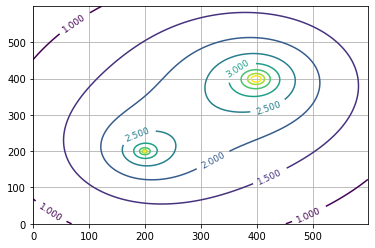

In [1]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

kD = 1e-3 #(m2/s)
S = 1e-4
xf1 = 200 #0 < (m) < 600
yf1 = 200 #0 < (m) < 600
xf2 = 400 #0 < (m) < 600
yf2 = 400 #0 < (m) < 600
Qf1 = 350 #m3/j
Qf2 = 500 #m3/j
t = 5  # pompage synchrones heure


x = np.linspace(0,600,600)
y = np.linspace(0,600,600)
X, Y = np.meshgrid(x, y)

r1 = np.sqrt((X-xf1) ** 2 + (Y-yf1) ** 2)
u1 = r1**2. * S / (4 * (kD * 86400) * (t / 24))
s1 = Qf1/(4 * np.pi * (kD * 86400)) * sp.exp1(u1)

r2 = np.sqrt((X-xf2) ** 2 + (Y-yf2) ** 2)
u2 = r2**2. * S / (4 * (kD * 86400) * (t / 24))
s2 = Qf2/(4 * np.pi * (kD * 86400)) * sp.exp1(u2)

level = np.arange(1,5,0.50) #valeur des iso (min,max,delta)
map = plt.contour(s1+s2,level)
plt.clabel(map, fontsize=9, inline=1)
plt.grid()
plt.show()

## Superposition temporelle - Etude de la remontée après arrêt du pompage

Lorsque le pompage est stoppé, le niveau d'eau remonte dans le puits vers la valeur initiale (le niveau statique) avant pompage, avec une valeur de rabattement mesurée qui tend vers zéro. Les rabattements observés correspondent à des **rabattements résiduels**. L'étude de la remontée peut être utilisée pour déterminer certains paramètres hydrodynamiques.

<figure>
  <IMG SRC="superpos1.png" WIDTH=550 ALIGN="center">
</figure>
    
Les solutions à l'équation de diffusivité classiques (Theis, Cooper-Jacob) ne sont pas directement utilisables pour quantifier l'évolution du niveau piézométrique au cours du temps lors de la remonté. 
Par exemple, la solution de Cooper-Jacob est:

$$
s = \frac{2.3Q}{4 \pi T} log\left({\frac{2.25Tt}{r^2S}}\right)
$$
    
Si $Q = 0$, alors $s = 0$ dès l'arrêt du pompage, ce qui est contraire au observations avec $s$ qui remonte progressivement au cours du temps.
L'utilisation du principe de superposition va permettre de determiner une solution utilisable pour calculer le rabattement résiduel, en simulant de manière indirecte un débit $Q = 0$, à partir de 2 solutions élémentaires de pompage au débit $Q1 = Q$ et $Q_2 = -Q$, dont la somme algébrique $Q_T = Q_1 + Q_2 = +Q + (-Q) = 0$

<figure>
  <IMG SRC="superpos2.png" WIDTH=750 ALIGN="center">
</figure>
    
Si on considère un pompage jusqu'à $t_f$, on exprime le rabattement à l'instant $t>t_f$ à partir de la solution de Theis à l'aide de 2 termes:
    
*Pompage période $t_0$ à $t$*

$$s_{(+)} = \frac{Q}{4 \pi T}W \left({\frac{r^2S}{4T(t_f + t) }} \right)$$

*Injection sur la période $t_f$ à $t$*

$$s_{(-)} = \frac{-Q}{4 \pi T}W \left({\frac{r^2S}{4T(t) }} \right)$$

Le rabattement résiduel $s_r(t)$ est la somme des 2 termes:
$$
s = s_{(+)} + s_{(-)} = \frac{Q}{4 \pi T} \left[{W(u) - W(u')} \right]
$$

Dans l'hypothèse où les conditions d'application sont respectées, o peut utiliser la formulation de Cooper - Jacob pour le même raisonnement. Il vient alors   
$$
\left.
\begin{array}{ll}
s_{(+)} = \frac{2.3Q}{4 \pi T} log \left({\frac{2.25 T(t_f + t)}{r^2 S}} \right)\\
s_{(-)} = \frac{2.3(-Q)}{4 \pi T} log \left({\frac{2.25 Tt}{r^2 S}} \right)
\end{array}
\right \}\Longrightarrow s_r = \frac{2.3Q}{4 \pi T} log \left({\frac{(t_f + t)}{t}} \right)
    $$
    
En reprenant les notations comme suit:
- $Q$ débit de pompage durant l'essai
    
- $t$ temps écoulé depuis le début du pompage
- $t'$ temps écoulé depuis le début de la remontée
- $s'$ rabattement résiduel

L'approximation de Cooper - Jacob s'exprime:
    
$$
s' = \frac{2.3Q}{4 \pi T}log \left(\frac{t}{t'}\right)
$$
    
L'évolution du rabattement résiduel est une fonction logarithme base 10 du ratio temps écoulé despuis le début du pompage par rapport au temps écoulé depuis le début de la remontée. La pente de cette droite peut être utilisée pour calculer la transmissivité, de manière analogue à l'interprétation en descente.
    
<figure>
  <IMG SRC="superpos3.png" WIDTH=450 ALIGN="center">
</figure>

La pente de la droite, calculée sur un cycle log corresponds à :
    
$$
\alpha = \frac{s_a - s_b}{log ((t/t')_a) -log ((t/t')_b)} = \frac{\Delta s}{log(\frac{(t/t')_a}{(t/t')_b})} = \Delta s
$$

on a alors par analogie avec l'équation l'expression directe pour $T$ (6):
$$
T = \frac{2.3Q}{4 \pi \Delta s}
$$
    
**Rmq: l'exploitation de la remontée ne permet pas d'estimer la valeur du coefficient d'emmagasinement**

### Application : essai de nappe standard - analyse de la remontée du niveau

Lors d'un stage à l'étranger, vous suivez un essai de nappe réalisé sur une nappe captive. Un puits $F$ est pompé au débit de 163 cubic feet/minute durant 800 minutes. A l'arret du pompage, la remontée du niveau est enregistrée à un piézomètre $P_a$ situé à 100 feet de $F$ (fichier TD_Remontee.txt). Le niveau statique de la nappe avant le pompage est $N_{stat} = -61.2$ feet/repère.
1. Construire le graphique expérimental	$s = log10(t/t')$ pour la remontée;
2. Interpréter les données de remontée afin d'estimer les paramètres hydrodynamiques de l'aquifère

Resultats interprétation:
T = 3.5e+01 feet2/min
T = 5.4e-02 m2/s
S = ....   et non on ne peut pas calculer S !!!


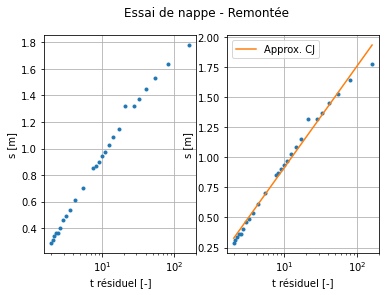

In [66]:
# INTERPRETATION DE LA REMONTEE

import numpy as np
import scipy.special as sp
import math as math
import matplotlib.pyplot as plt

fname ='TD_Remontee.txt'
data = np.loadtxt(fname,  skiprows=1) # chargement des donnees de l'essai de nappe - saute 1ere ligne
# colonnes sont [t[minutes], prof[feet/rep]] (voir 1ere ligne fichier texte)

tp = 800 #duree du pompage (min)
r  = 100 #distance du piezometre d'observation (feet)
Q = 163 #feet3/min
trem = data[:,0]
tres = (tp+trem)/trem #calcul du temps residuel
s = data[:,1]-61.2 #prof(t) - prof(t=0) feet

m, b = np.polyfit(np.log10(tres),s, 1)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Essai de nappe - Remontée')
ax1.set(ylabel='s [m]', xlabel='t résiduel [-]')
ax2.set(ylabel='s [m]', xlabel='t résiduel [-]')

ax1.semilogx(tres, s, '.')
ax1.grid()

ax2.semilogx(tres, s, '.')
ax2.semilogx(tres, m * np.log10(tres) + b,'-', label='Approx. CJ' ) 
ax2.legend()
ax2.grid()

T = (2.3*Q)/(4*3.1415*m)

print('Resultats interprétation:')
print('T = {:.1e} feet2/min'.format(T))
print('T = {:.1e} m2/s'.format(T*0.092/60))

print('S = ....   et non on ne peut pas calculer S !!!'.format(S))


## Superposition spatiale - Effet de limite

Dans la plupart des situations réelles les aquifères ne peuvent pas être considérés comme infinis
A partir d'un horizon de temps variable, des effets de limite peuvent se manifester sur la courbe d'évolution du rabattement entraînant un écart au modèle logarithmique de Cooper-Jacob, correspondant à l'influence de ces limites. L'effet de ces limites se manifeste selon 2 comportements principaux:
- un rabattement inférieur au modèle de Cooper-Jacob, traduisant un impact moindre du pompage pour fournir un débit constant: on parle de **limite alimentée**. physiquement, cela peut correspondre à une rivière, un lac, ...
- un rabattement supérieur au modèle de Cooper-Jacob, traduisant un impact plus important du pompage pour fournir un débit constant: on parle de **limite imperméable**. Physiquement, cela peut correspondre à une variations latérale de faciès, une faille, ...

<figure>
  <IMG SRC="superpos5.png" WIDTH=550 ALIGN="center">
</figure>
    
Les effets de limite peuvent être estimés à l'aide du principe de superposition (spatiale et temporelle).
$\Longrightarrow$ Utilisation de systèmes composés de différents puits réels et fictifs permettant de restituer le comportement hydraulique réel du système. La solution mathématique du système réel correspond à la somme des solutions élémentaires du système composite virtuel.
    
<figure>
  <IMG SRC="superpos4.png" WIDTH=850 ALIGN="center">
</figure>
    
### Exemple: limite alimentée
On considère un aquifère limité latéralement par une rivièreen connexion hydraulique. Un système est composé par un puits de pompage F et un piézomètre P, selon le système présenté sur la figure suivante.
    
<figure>
  <IMG SRC="superpos6.png" WIDTH=550 ALIGN="center">
</figure>

Pour restituer l'effet de la limite, on utilise un "puits image $F'$", symétrique du puits de pompage F par rapportà la limite (la faille). Ce puits fictif est injecté de manière synchrone au débit $-Q$, afin de restituer l'impact hydraulique de la rivière, qui va "fournir" de l'eau à l'aquifère dès que le cône de rabattement aura atteint cette dernière. On a donc:
- Forage réel $F$: $+ Q$, $d_{F-P}=r$
- Forage image fictif $F'$: $-Q$, $d_{F'-P}=r_i$

A l'aide de la solution de Theis, le rabattement total au piézomètre $P$ s'exprime à l'aide des solutions élémentaires pour chacun des puits (réel et image) exprimées pour la distance entre chaque puits et le piézomètre:
$$
s_T = s_{F \Rightarrow P} + s_{F' \Rightarrow P}
$$

$$
s_T ={\frac{Q}{4 \pi T}W \left({\frac{r^2S}{4Tt) }} \right)} + {\frac{-Q}{4 \pi T}W \left({\frac{r_i^2S}{4Tt) }} \right)}
$$

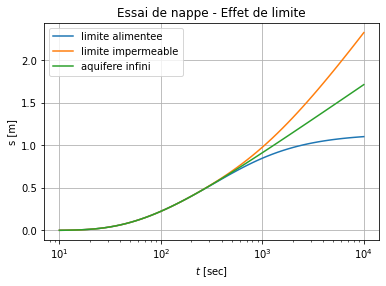

In [117]:
import numpy as np
import scipy.special as sp
import math as math
import matplotlib.pyplot as plt #mode retina - qualité meilleure


T = 0.005 #m2/sec
S = 1e-4

Q = 80/(3600) # m3/min
xp = 50 #0 < (m) origine repere puits F
yp = 50 #0 < (m) origine repere puits F
z = 200

r  = math.sqrt(xp**2+yp**2) #distance du piezometre d'observation

ri = math.sqrt((2*z-xp)**2+yp**2)

# valeurs de t à utiliser pour x-axis
t = np.logspace(1, 4, 61)

# calcul du rabattement au piezometre
# utilisation de la solution de Theis
#puits reel
sF = (Q)/(4*3.14*T)*sp.exp1((r**2*S)/(2.25*T*t))
#puits image
sFi_ali = (-Q)/(4*3.14*T)*sp.exp1((ri**2*S)/(2.25*T*t))
sFi_imp = (Q)/(4*3.14*T)*sp.exp1((ri**2*S)/(2.25*T*t))

#s piezometre
sp_ali = sF + sFi_ali
sp_imp = sF + sFi_imp


plt.title('Essai de nappe - Effet de limite')
plt.ylabel('s [m]')
plt.xlabel('$t$ [sec]')
plt.xscale('log')
plt.grid()
plt.plot(t, sp_ali, label='limite alimentee')
plt.plot(t, sp_imp,label='limite impermeable')
plt.plot(t, sF,label='aquifere infini')
plt.legend()
plt.show()


### Application : essai de nappe standard

Pour caractériser les propriétés hydrodynamiques d'un aquifère, un essai de nappe est réalisé. Un puits $F$ est pompé au débit de 547 litre/minute durant 72 heures. Les profondeurs sont enregistrés à un piézomètre $P_a$ situé à 8.2 mètres de $F$ (fichier TD_Superposition.txt). Le niveau statique de la nappe est $N_{stat} = -5.32$ mètre/repère.
1. Construire le graphique expérimental	$s = log10(t)$;
2. A l'aide de la solution de Cooper-Jacob, déterminer les paramètres hydrodynamiques de l'aquifère (T et S);
3. Quelles informations supplémentaires peut on obtenir 

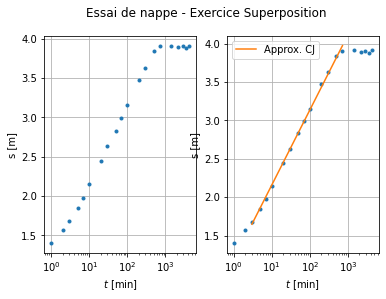

pente =  0.9765057714584797
ordonnée origine =  1.182418639020706
intercept t0  = 6.15e-02 [min]
Resultats interprétation:
T = 1.0e-01 m2/min
S = 2.1e-04 (-)
u1 = 2.1e-02
Stabilisation du rabattement donc effet de limite alimentée très probable


In [115]:
import numpy as np
import scipy.special as sp
import math as math
import matplotlib.pyplot as plt

fname ='TD_Superposition.txt'
data = np.loadtxt(fname,  skiprows=1) # chargement des donnees de l'essai de nappe - saute 1ere ligne
# colonnes sont [t[minutes], prof[m]] (voir 1ere ligne fichier texte)

Q = 788/(24*60) # m3/min

r  = 8.2 #distance du piezometre d'observation
t = data[:,0]
s = data[:,1]-5.32 #prof(t) - prof(t=0)

t_cal = data[2:15,0]
s_cal = data[2:15,1]-5.32

m, b = np.polyfit(np.log10(t_cal),s_cal, 1)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Essai de nappe - Exercice Superposition')
ax1.set(ylabel='s [m]', xlabel='$t$ [min]')
ax2.set(ylabel='s [m]', xlabel='$t$ [min]')

ax1.semilogx(t, s, '.')
ax1.grid()

ax2.semilogx(t, s, '.')
ax2.semilogx(t_cal, m * np.log10(t_cal) + b,'-', label='Approx. CJ' ) 
ax2.legend()
ax2.grid()
plt.show()

print('pente = ', m)
print('ordonnée origine = ', b)

#calcul de t0 - approche analytique
t0 = pow(10,-b/m)
print('intercept t0  = {:.2e} [min]'.format(t0))

#calcul des parametres T et S de l'aquifère
T = (2.3*Q)/(4*3.1415*m)
S = (2.25*T*t0)/r**2
u1 = r**2*S/(4*T*(data[2,1]-5.32))
print('Resultats interprétation:')
print('T = {:.1e} m2/min'.format(T))
print('S = {:.1e} (-)'.format(S))
print('u1 = {:.1e}'.format(u1))

# effet de limite identifié ==> limite alimentée
print('Stabilisation du rabattement donc effet de limite alimentée très probable')